In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
# READ DATA
full_df = pd.read_csv('log_summary1.csv')

In [10]:
# make the dataset
# Change this do desired number of fine tuning blocks
unfrozen_blocks = 3

# HIGHERST ACC
by_list = ['target_ds', 'num_training_images', 'seed', 'source_eps', 'unfrozen_blocks'] 

# HIGHEST EPOCH
group_by = ['target_ds', 'num_training_images', 'source_eps', 'seed', 'unfrozen_blocks']
best_df = full_df.groupby(by=group_by).apply(lambda x: x[x['epoch'] == max(x['epoch'])]).reset_index(drop=True)

inc = by_list + ['nat_prec1']
best_df = best_df.drop_duplicates(subset=inc).reset_index(drop=True)

data = best_df[((best_df['source_eps'].isin([0,3]))) & (best_df['unfrozen_blocks'] == unfrozen_blocks)]

target_ds_map = {
    # 'cifar100': 'CIFAR-100',
    'cifar10' : 'CIFAR-10',
    # 'svhn'    : 'SVHN',
    # 'fmnist'  : 'FMNIST',
    'kmnist'  : 'KMNIST',
    # 'mnist'   : 'MNIST',
}

data.replace(target_ds_map, inplace=True)
data = data[data['downscaled'] == True]

# get delta
source_eps_3 = data[(data['source_eps'] == 3)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
source_eps_0 = data[(data['source_eps'] == 0)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)

delta_df = source_eps_3.copy()
delta_df['nat_prec1_delta'] =  source_eps_3['nat_prec1'] - source_eps_0['nat_prec1']
# delta_df['source_eps'] = '3 minus 0'

# Experiment 1 
Moving Models to different dataset

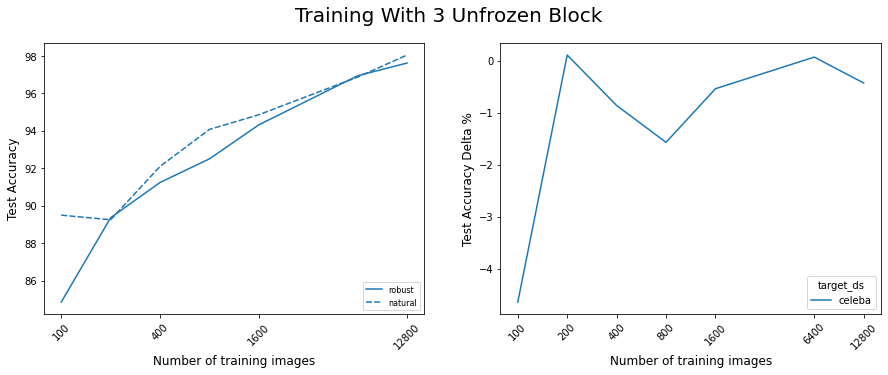

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib
%matplotlib inline

axis_fontsize = 12

# Change this to plot desired dataset
target = 'celeba'

xticks = np.sort(data[data['target_ds'] == target]['num_training_images'].unique())
target_datasets = [target]



fig = plt.subplots(figsize=(15,5))
plt.suptitle(f"Training With {unfrozen_blocks} Unfrozen Block", size=20)

ax = plt.subplot(1, 2, 1)

sns.lineplot(x='num_training_images', y='nat_prec1', style='source_eps', style_order=[3, 0],
                data=data[data['target_ds']==  target], 
                ax = ax,  markeredgecolor=sns.xkcd_rgb["dark grey"])

ax.set_xscale('log',base=2)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ylabel('Test Accuracy', fontsize=axis_fontsize)
ax.set_xlabel('Number of training images', fontsize=axis_fontsize)
ax.set_xticks(xticks[::2])

ax.tick_params(axis='x', labelrotation=45)
handles, labels = ax.get_legend_handles_labels()

ax.legend(labels=['robust', 'natural'], loc='lower right', fontsize=8).set_zorder(0)

ax = plt.subplot(1, 2, 2)

sns.lineplot(x='num_training_images', y='nat_prec1_delta', hue='target_ds', hue_order=target_datasets, 
             data=delta_df[delta_df['unfrozen_blocks'] == unfrozen_blocks], ax = ax,
              markers=['^'], markeredgecolor=sns.xkcd_rgb["dark grey"])

ax.set_xscale('log',base=2)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks(xticks)
# ax.set_title('Robust minus natural model accuracy')
ax.set_ylabel('Test Accuracy Delta %', fontsize=axis_fontsize)
ax.set_xlabel('Number of training images', fontsize=axis_fontsize)
ax.tick_params(axis='x', labelrotation=45)
